In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecVideoRecorder
import pandas as pd
import os

In [2]:
log_dir = "./logs/"
video_dir = "./videos/"
os.makedirs(log_dir, exist_ok=True)
os.makedirs(video_dir, exist_ok=True)

In [3]:
def make_env():
    env = gym.make("LunarLander-v3")
    env = Monitor(env, log_dir)
    return env

In [4]:
env = DummyVecEnv([make_env])

In [5]:
model = PPO("MlpPolicy", env=env)

In [ ]:
# Train in milestones (time steps) and record videos
milestones = [50000, 200000, 500000]
total_steps = 0

In [7]:
for steps in milestones:
    # Train until next milestone
    model.learn(total_timesteps=steps - total_steps, reset_num_timesteps=False)
    total_steps = steps
    
    # Save model at this milestone
    model_path = f"ppo_lunar_{steps}steps"
    model.save(model_path)
    
    # Create video recording env
    eval_env = DummyVecEnv([lambda: Monitor(gym.make("LunarLander-v3", render_mode="rgb_array"))])
    video_path = os.path.join(video_dir, f"milestone_{steps}")
    
    eval_env = VecVideoRecorder(eval_env, video_path, record_video_trigger=lambda x: x == 0, video_length=1000, name_prefix=f"ppo_lunar_{steps}")
    
    # Run agent to record video
    obs = eval_env.reset()
    for _ in range(1000):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = eval_env.step(action)
    eval_env.close()
    
    print(f"Video for milestone {steps} steps saved to {video_path}")

Saving video to c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_50000\ppo_lunar_50000-step-0-to-step-1000.mp4
MoviePy - Building video c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_50000\ppo_lunar_50000-step-0-to-step-1000.mp4.
MoviePy - Writing video c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_50000\ppo_lunar_50000-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_50000\ppo_lunar_50000-step-0-to-step-1000.mp4
Video for milestone 50000 steps saved to ./videos/milestone_50000
Saving video to c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_200000\ppo_lunar_200000-step-0-to-step-1000.mp4
MoviePy - Building video c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_200000\ppo_lunar_200000-step-0-to-step-1000.mp4.
MoviePy - Writing video c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_200000\ppo_lunar_200000-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_200000\ppo_lunar_200000-step-0-to-step-1000.mp4
Video for milestone 200000 steps saved to ./videos/milestone_200000
Saving video to c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_500000\ppo_lunar_500000-step-0-to-step-1000.mp4
MoviePy - Building video c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_500000\ppo_lunar_500000-step-0-to-step-1000.mp4.
MoviePy - Writing video c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_500000\ppo_lunar_500000-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\Lenovo\Desktop\reinforcement-learning\videos\milestone_500000\ppo_lunar_500000-step-0-to-step-1000.mp4
Video for milestone 500000 steps saved to ./videos/milestone_500000


In [8]:
# Evaluate final agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

Mean reward: 248.01 +/- 17.03


When we wrap a Gymnasium/Stable-Baselines3 environment with Monitor, it creates a CSV log (monitor.csv) with 3 columns.
- r: total reward obtained in the episode.
- l: episode length
- t: time - wall-clock time in seconds since the monitor started logging

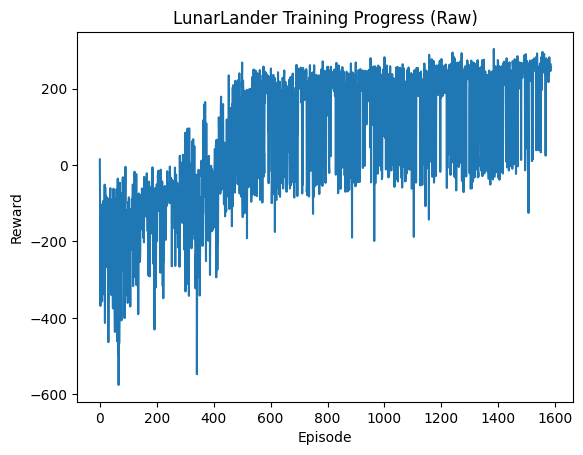

In [9]:
# Plot raw episode rewards
# shows the total reward reward obtained in reach episode.
log_data = pd.read_csv(os.path.join(log_dir, "monitor.csv"), skiprows=1)

plt.plot(log_data["r"])
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("LunarLander Training Progress (Raw)")
plt.show()

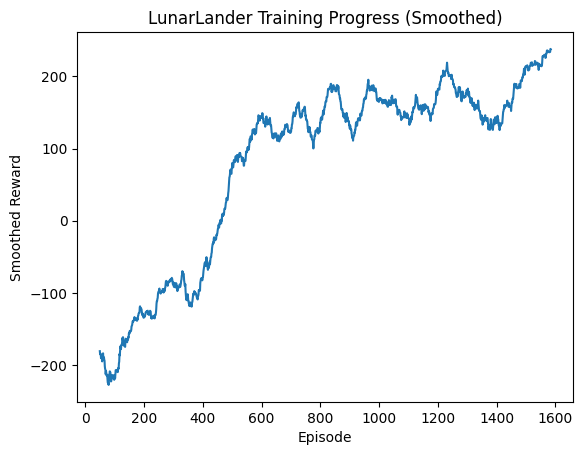

In [10]:
# Plot smoothed rewards
# This plot shows a moving average of rewards over a window of 50 episodes.
# Smoothing reduces noise and makes it easier to see the overall learning trend and whether the agent is improving steadily over time

window = 50
smoothed_rewards = log_data["r"].rolling(window).mean()

plt.plot(smoothed_rewards)
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward")
plt.title("LunarLander Training Progress (Smoothed)")
plt.show()

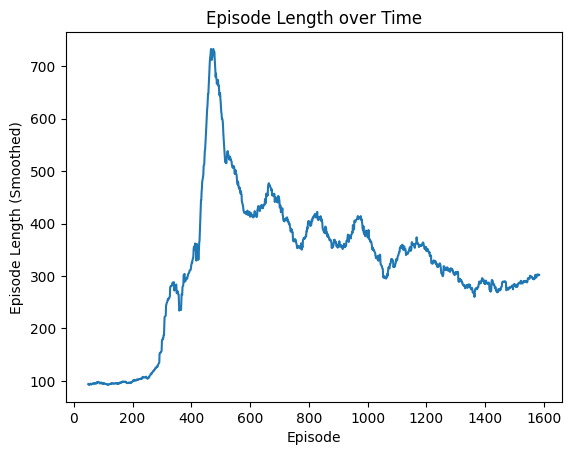

In [11]:
# visualize if the agent is staying alive longer as the training progresses

plt.plot(log_data["l"].rolling(50).mean())
plt.xlabel("Episode")
plt.ylabel("Episode Length (Smoothed)")
plt.title("Episode Length over Time")
plt.show()